![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()
df['comment_text'] = df['comment_text'].str.replace('[#,@,&,?]', '')

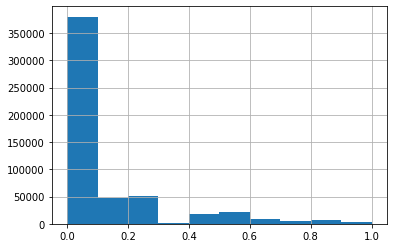

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
print(X.shape)

(541462,)


In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

count_vect = CountVectorizer(lowercase=False, stop_words='english', min_df=0.005,dtype=np.int8)
matrix_tokens_train = count_vect.fit_transform(X_train)
matrix_tokens_test = count_vect.transform(X_test)
array_tokens_train = matrix_tokens_train.todense()
print(array_tokens_train.shape)

array_tokens_test = matrix_tokens_test.todense()

df = pd.DataFrame(data=array_tokens_train,columns = count_vect.get_feature_names())
modelo=RandomForestRegressor (random_state=1)
modelo.fit(df, y_train)
yPred= modelo.predict(array_tokens_test)
print(f'RMSE {math.sqrt(mean_squared_error(y_test, yPred))}')



(362779, 823)
RMSE 0.19344002327153711


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

count_vect = CountVectorizer(lowercase=False, ngram_range=(3,3),stop_words='english',  min_df=0.0001, dtype=np.int8)
matrix_tokens_train = count_vect.fit_transform(X_train)
matrix_tokens_test = count_vect.transform(X_test)
array_tokens_train = matrix_tokens_train.toarray()
array_tokens_test = matrix_tokens_test.toarray()
print(array_tokens_train.shape)

df = pd.DataFrame(data=array_tokens_train,columns = count_vect.get_feature_names())
modelo=RandomForestRegressor (random_state=1)
modelo.fit(df, y_train)
yPred= modelo.predict(array_tokens_test)
print(f'RMSE {math.sqrt(mean_squared_error(y_test, yPred))}')


(362779, 491)
RMSE 0.19738063565047737


# CountVectorizer vs TfidfVectorizer
***
CountVectorizer convierte a "corpus" en una representación de frecuencias de n-grams. Esto tiene algunas desventajas a saber:
- Falta de capacidad de identificar los n-grams más importantes o menos importantes para análisis.
- Limita su capacidad a considerar que las palabras más frecuentes en un corpus, son las más significativas estadisticamente hablando.
- No identifica relaciones tales como similaridad linguística entre palabras.

Debido a estas desventajas , aparece TfidfVectorizer el cual es el equivalente a CountVectorizer seguido de TfidfTransformer. TfIdf significa Term-Frecuency/Inverse Document Frecuency. Este es un estadístico que se basa en la frecuecia de una palabra en el corpus pero tambien representa que tan importante es una palabra para análisis estadístico. Aqui, es donde cobra importancia TfidfVectorizer porque no solamente se centra en la frecuencia de las palabras sino en la importancia de las mismas. Esto repercute inmediatamente en el hecho que se podrían remover las menos importantes para reducir la complejidad del modelo y la dimensionalidad.  
La intuición de este concepto, consiste en que las palabras demasiado abundantes o palabras demasiado raras son no estadísticamente importantes. Valores altos de TFIDF significa un mayor grado de importancia de esa palabra. Por el contrario, valores pequenos de TFIDF representan un menor grado de importancia.
La desventaja de TfidfVectorizer es que no puede reconocer las relaciones tales como la similaridad linguística entre palabras.

\



#Celda 3


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 4
from  sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

tfid = TfidfVectorizer(lowercase=False,stop_words='english', min_df=0.05,dtype=np.int8)
matrix_tokens_train = tfid.fit_transform(X_train)
matrix_tokens_test = tfid.transform(X_test)
array_tokens_train = matrix_tokens_train.toarray()
print(array_tokens_train.shape)
array_tokens_test = matrix_tokens_test.toarray()

df = pd.DataFrame(data=array_tokens_train,columns = tfid.get_feature_names())
print(df)
modelo=RandomForestRegressor (random_state=1)
modelo.fit(df, y_train)
yPred= modelo.predict(array_tokens_test)
print(f'RMSE {math.sqrt(mean_squared_error(y_test, yPred))}')

(362779, 26)
        And   If        It  That       The      They  This  Trump   We  What  \
0       0.0  0.0  0.000000   0.0  0.000000  0.000000   0.0    0.0  0.0   0.0   
1       0.0  0.0  0.000000   0.0  0.554942  0.000000   0.0    0.0  0.0   0.0   
2       0.0  0.0  0.000000   0.0  1.000000  0.000000   0.0    0.0  0.0   0.0   
3       0.0  0.0  0.000000   0.0  0.000000  0.000000   0.0    0.0  0.0   0.0   
4       1.0  0.0  0.000000   0.0  0.000000  0.000000   0.0    0.0  0.0   0.0   
...     ...  ...       ...   ...       ...       ...   ...    ...  ...   ...   
362774  0.0  0.0  0.894185   0.0  0.000000  0.000000   0.0    0.0  0.0   0.0   
362775  0.0  0.0  0.000000   0.0  0.000000  0.000000   0.0    0.0  0.0   0.0   
362776  0.0  0.0  0.000000   0.0  0.000000  0.000000   0.0    1.0  0.0   0.0   
362777  0.0  0.0  0.000000   0.0  0.000000  0.000000   0.0    0.0  0.0   0.0   
362778  0.0  0.0  0.000000   0.0  0.558642  0.278252   0.0    0.0  0.0   0.0   

        ...      like  mak

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

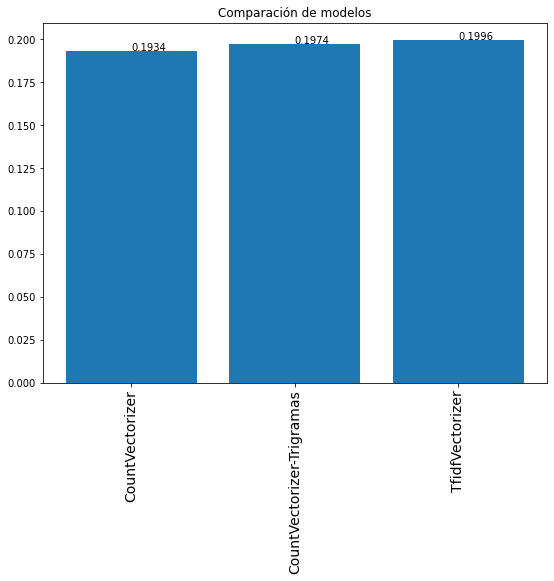

In [15]:
# Importación de librerías

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['CountVectorizer','CountVectorizer-Trigramas', 'TfidfVectorizer']
ejeY = [0.19344002327153711, 0.19738063565047737,0.19963546230011214
]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],"{:.4f}".format(y[i]),fontsize=10)
addlabels(ejeX,ejeY,plt)
plt.xticks(fontsize=14, rotation=90)
plt.show()

# Comparacion
***

- Hacer la aclaracion , fue posible correr los modelos tratando de reducir el vocabulario en cada modelo y que obviamente afecta el RMSE resultante.
- Previamente se limpio el corpus eliminando caracteres especiales.

- En todos los modelos se uso stop-words=english para reducir el vocabulario.

- Para el primer modelo, se hizo uso de min_df del 0.5% para reducir el vocabulario a 823 terminos. RMSE resultante=0.19344002327153711. Este tomo 8 horas para correr.
- Para el segundo modelo, se hizo uso de min-df=0.01% para reducir el vocabulario a 491 terminos.RMSE resultante=0.19738063565047737. Este tomo 6 horas para correr.

- Paral tercer modelo, min df=5% con el objetivo de reducir el vocabulario y bajar el tiempo de entrenar el modelo dramaticamente. Esto dio un vocabulario de 26 terminos. Nos hubiese gustado correr el ejercicio con un min_df=0.1% para aumentar el vocabulario pero por falta de tiempo en el entrenamiento, no fue posible. 